# Libraries

In [26]:
import os
import glob
from tqdm import tqdm
import re 
import pandas as pd
import numpy as np
import random
import shutil
from sklearn.model_selection import train_test_split
from pathlib import Path


from skimage import io
import matplotlib.pyplot as plt


# Variables

## Path

In [2]:
root_dir ='C:/Users/thibe/Google Drive/@Projet datascientest/'
raw_data_dir = root_dir + 'RAW DATA/'
new_dir = root_dir + 'RAW DATA FOR DEBUG/' 

## Other 

In [3]:
range_years = (2006,2007)
nb_family_classes = 10 

# Load df with raw data paths

In [4]:
# LOAD 
df_paths =  pd.read_csv(root_dir + 'image_and_json_data.csv')


C:\Users\thibe\.conda\envs\Mush\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# correct new path suite renommage dossier 
df_paths['file_path'] =df_paths['file_path'].apply(lambda x: x.replace('/Projet datascientest','/@Projet datascientest'))

In [6]:
#select only 320,240 images with family info
df_paths = df_paths[df_paths['resolution']=='(320, 240)']

In [7]:
# drop na 
df_paths = df_paths[df_paths['gbif_info.family'].notna()]

In [8]:
# filter to get only years of interest 
df_paths = df_paths[df_paths['file_year'].between(range_years[0],range_years[1])]
# df_paths

In [9]:
# keep top families only 
top = list(df_paths['gbif_info.family'].value_counts().index.values)[:nb_family_classes]
df_paths = df_paths.loc[df_paths['gbif_info.family'].isin(top)]
df_paths['gbif_info.family'].value_counts()

Russulaceae         226
Agaricaceae         224
Amanitaceae         194
Tricholomataceae    167
Strophariaceae      153
Boletaceae          138
Psathyrellaceae     100
Cortinariaceae       99
Suillaceae           97
Inocybaceae          82
Name: gbif_info.family, dtype: int64

In [10]:
df_paths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 5 to 4922
Data columns (total 38 columns):
file_name                   1480 non-null object
file_path                   1480 non-null object
resolution                  1480 non-null object
file_year                   1480 non-null int64
image_id                    1480 non-null int64
format                      1480 non-null object
observation                 1480 non-null object
label                       1480 non-null object
image_url                   1480 non-null object
user                        1480 non-null object
date                        1480 non-null object
thumbnail                   1480 non-null int64
location                    1480 non-null object
gbif_info.kingdom           1480 non-null object
gbif_info.family            1480 non-null object
gbif_info.speciesKey        1304 non-null float64
gbif_info.rank              1480 non-null object
gbif_info.phylum            1480 non-null object
gbif_info.ord

# Split test/train

In [11]:
df_paths_train, df_paths_test = train_test_split(df_paths, test_size=0.2, stratify=df_paths['gbif_info.family'])

# Create new paths

In [12]:
df_paths_train['file_path'].values[0]

'C:/Users/thibe/Google Drive/@Projet datascientest/RAW DATA/IMAGES/2007\\Agaricus bernardi\\6746.jpg'

In [13]:
def path_replace(raw_path, family,training_or_testing):
    new_path = re.sub(r'/@Projet datascientest/RAW DATA/IMAGES/' + r'\d{4}\\.*\\', 
                  '/@Projet datascientest/RAW DATA FOR DEBUG/' + training_or_testing + '/' + family + '/' , raw_path)
    return new_path

In [14]:
# training 
df_new_paths_train = df_paths_train.copy()
df_new_paths_train['new_path'] = df_new_paths_train.apply(lambda x: path_replace(x['file_path'],
                                                                                 x['gbif_info.family'],
                                                                                'Training'),1)
df_new_paths_train['train_test'] = 'Training'

# testing 
df_new_paths_test = df_paths_test.copy()
df_new_paths_test['new_path'] = df_new_paths_test.apply(lambda x: path_replace(x['file_path'],
                                                                                 x['gbif_info.family'],
                                                                                'Testing'),1)
df_new_paths_test['train_test'] = 'Testing'

In [15]:
#concatenate both dir 
df_new_paths = pd.concat([df_new_paths_train,df_new_paths_test])
df_new_paths

,file_name,file_path,resolution,file_year,image_id,format,observation,label,image_url,user,...,gbif_info.class,gbif_info.synonym,gbif_info.scientificName,gbif_info.genus,gbif_info.order,gbif_info.note,gbif_info,json_file,new_path,train_test
1381,6746.jpg,C:/Users/thibe/Google Drive/@Projet datascient...,"(320, 240)",2007,6746,jpg,4278,Agaricus bernardi,http://mushroomobserver.org/images/320/6746,1,...,Agaricomycetes,False,"Agaricus bernardii Quél., 1878",Agaricus,Agaricales,NaN,NaN,observations_0.json,C:/Users/thibe/Google Drive/@Projet datascient...,Training
338,507.jpg,C:/Users/thibe/Google Drive/@Projet datascient...,"(320, 240)",2006,507,jpg,408,Coprinellus micaceus,http://mushroomobserver.org/images/320/507,1,...,Agaricomycetes,False,"Coprinellus micaceus (Bull.) Vilgalys, Hopple ...",Coprinellus,Agaricales,NaN,NaN,observations_0.json,C:/Users/thibe/Google Drive/@Projet datascient...,Training
1875,4009.jpg,C:/Users/thibe/Google Drive/@Projet datascient...,"(320, 240)",2007,4009,jpg,2915,Boletus edulis var. grandedulis,http://mushroomobserver.org/images/320/4009,123,...,Agaricomycetes,True,Boletus edulis var. grandedulis Arora & Simoni...,Boletus,Boletales,NaN,NaN,observations_0.json,C:/Users/thibe/Google Drive/@Projet datascient...,Training
4632,8992.jpg,C:/Users/thibe/Google Drive/@Projet datascient...,"(320, 240)",2007,8992,jpg,5288,Suillus pungens,http://mushroomobserver.org/images/320/8992,2,...,Agaricomycetes,False,"Suillus pungens Thiers & A.H. Sm., 1964",Suillus,Boletales,NaN,NaN,observations_0.json,C:/Users/thibe/Google Drive/@Projet datascient...,Training
137,855.jpg,C:/Users/thibe/Google Drive/@Projet datascient...,"(320, 240)",2006,855,jpg,718,Amanita phalloides,http://mushroomobserver.org/images/320/855,2,...,Agaricomycetes,False,"Amanita phalloides (Vaill. ex Fr.) Link, 1833",Amanita,Agaricales,NaN,NaN,observations_0.json,C:/Users/thibe/Google Drive/@Projet datascient...,Training
1312,1592.jpg,C:/Users/thibe/Google Drive/@Projet datascient...,"(320, 240)",2006,1592,jpg,1427,Xerocomellus chrysenteron,http://mushroomobserver.org/images/320/1592,2,...,Agaricomycetes,False,"Xerocomellus chrysenteron (Bull.) Šutara, 2008",Xerocomellus,Boletales,NaN,NaN,observations_0.json,C:/Users/thibe/Google Drive/@Projet datascient...,Training
4265,8496.jpg,C:/Users/thibe/Google Drive/@Projet datascient...,"(320, 240)",2007,8496,jpg,5037,Russula,http://mushroomobserver.org/images/320/8496,2,...,Agaricomycetes,False,Russula Pers.,Russula,Russulales,NaN,NaN,observations_0.json,C:/Users/thibe/Google Drive/@Projet datascient...,Training
728,1731.jpg,C:/Users/thibe/Google Drive/@Projet datascient...,"(320, 240)",2006,1731,jpg,1587,Lactarius xanthogalactus,http://mushroomobserver.org/images/320/1731,2,...,Agaricomycetes,False,"Lactarius xanthogalactus Peck, 1907",Lactarius,Russulales,NaN,NaN,observations_0.json,C:/Users/thibe/Google Drive/@Projet datascient...,Training
694,1151.jpg,C:/Users/thibe/Google Drive/@Projet datascient...,"(320, 240)",2006,1151,jpg,982,Lacrymaria lacrymabunda,http://mushroomobserver.org/images/320/1151,2,...,Agaricomycetes,False,"Lacrymaria lacrymabunda (Bull.) Pat., 1887",Lacrymaria,Agaricales,NaN,NaN,observations_0.json,C:/Users/thibe/Google Drive/@Projet datascient...,Training
3054,2614.jpg,C:/Users/thibe/Google Drive/@Projet datascient...,"(320, 240)",2007,2614,jpg,2082,Inocybe,http://mushroomobserver.org/images/320/2614,2,...,Agaricomycetes,False,"Inocybe (Fr.) Fr., 1863",Inocybe,Agaricales,NaN,NaN,observations_0.json,C:/Users/thibe/Google Drive/@Projet datascient...,Training


# Copy files

In [16]:
# /!\ clear export dir ne marche pas 
# dir = new_dir
# shutil.rmtree(new_dir, ignore_errors=True)

# os.rmdir(dir_path)

In [17]:
for old_path,new_path in  zip(df_new_paths['file_path'].values,df_new_paths['new_path'].values):
    original = Path(old_path) # use path to convert to windowspath 
    target = Path(new_path)
    # create dir and copy
    os.makedirs(os.path.dirname(target), exist_ok=True)
    shutil.copy(original, target)

# Save df for infos

In [18]:
df_new_paths['file_path'] = df_new_paths['new_path']

In [19]:
df_new_paths.to_csv(root_dir + 'image_and_json_data_DEBUG.csv')

In [22]:
# open csv to check 
df_ =pd.read_csv(root_dir + 'image_and_json_data_DEBUG.csv')

In [30]:
paths = df_['file_path'].values
paths

array(['C:/Users/thibe/Google Drive/@Projet datascientest/RAW DATA FOR DEBUG/Training/Agaricaceae/6746.jpg',
       'C:/Users/thibe/Google Drive/@Projet datascientest/RAW DATA FOR DEBUG/Training/Psathyrellaceae/507.jpg',
       'C:/Users/thibe/Google Drive/@Projet datascientest/RAW DATA FOR DEBUG/Training/Boletaceae/4009.jpg',
       ...,
       'C:/Users/thibe/Google Drive/@Projet datascientest/RAW DATA FOR DEBUG/Testing/Suillaceae/1557.jpg',
       'C:/Users/thibe/Google Drive/@Projet datascientest/RAW DATA FOR DEBUG/Testing/Russulaceae/109.jpg',
       'C:/Users/thibe/Google Drive/@Projet datascientest/RAW DATA FOR DEBUG/Testing/Russulaceae/1987.jpg'],
      dtype=object)

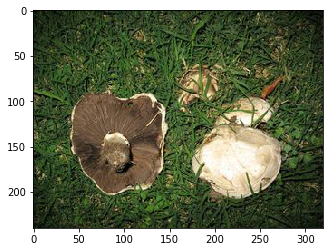

In [29]:
img = io.imread(paths[0]) 
plt.imshow(img)